# Assignment 4
Name: <font color=blue>____Jinglan Yang__杨景兰_______</font>,       ID: <font color=blue>________121090699_______________</font>

In [1]:
import numpy as np
import matplotlib.pylab as plt

### Helpful functions
The following functions may be helpful for your coding, but you can also choose to code it by yourself or modify it.

#### plot the two figures

In [2]:
def plot1(numbers, lam):
    '''For problem 5-2
        Parameters:
        ----------
        numbers: a list or an array with type int
            collections of the total number of arrivals for each round
        lam : float
            rate
    '''
    p = lambda k: np.exp(-lam)*lam**k/np.math.factorial(k)
    x = list(range(0, np.max(numbers)+1))
    plt.figure()
    plt.hist(numbers, range=(0, np.max(numbers)+1), bins=np.max(numbers)+1, alpha = 0.5, rwidth=0.5, label='empirical', color='orange', density=True)
    plt.bar(x, [p(k) for k in x], alpha = 0.5, width=0.5, label='theoretic')
    plt.xlabel(f'the number of arrival on [0, {time}]')
    plt.ylabel('probability')
    plt.legend(loc='upper left')
    plt.show()

In [3]:
def plot2(first_arrivals, lam, bins:int):
    '''For problem 5-3
        Parameters:
        ----------
        first_arrivals: a list or an array with type float
            collections of the first arrival time for each round
        lam: float
            rate
        bins: int 
            the number of bins of the histogram
    '''
    bin_width = time / bins
    G = lambda t: np.exp(-lam*t) # tail prob
    hight = lambda left: (G(left) - G(left+bin_width)) / bin_width 
    x = np.linspace(0, time, num=bins, endpoint=False)
    plt.figure()
    plt.hist(first_arrivals, range=(0, time), bins=bins, alpha = 0.5, rwidth=0.5, label='empirical', color='orange', density=True)
    plt.bar(x, [hight(k) for k in x], alpha = 0.5, width=0.5*bin_width, label='theoretic')
    plt.legend(loc='upper right')
    plt.xlabel('the time of the first arrival')
    plt.ylabel('intensity')
    plt.show()

Note that the intensity has the relation with the frequency:
$$\text{intensity}\times \text{bin width} = \text{frequency}$$

If you want to sample from some distributions, you can use `np.random`. For example
- exponential random variable with rate $\lambda$ can be sampled by `np.random.exponential(1/lambda)` (see [docs](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html))
- poisson random variable with mean $\lambda$ can be sampled by  `np.random.poisson(lambda)` (see [docs](https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html))
- uniform random variable with range [low, high] can be sampled by  `np.random.uniform(low,high,size=n)` (see [docs](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html))

## Question 5

In [4]:
time = 1 # we just focus on the interval [0,1] in this problem.
np.random.seed(42) # set random seed for reproduction.

### 5-1
Write two functions **Poisson1** and **Poisson2** to simulate the sequence of arrival times of events on $[0,1]$ for a Poisson process with rate $\lambda$, where $\lambda$ is the input to your functions. In **Poisson1**, the simulation is based on generating i.i.d. inter-arrival times. In **Poisson2**, you first generate the total number of arrivals and then the conditional distribution of arrival times.

In [5]:
def Poisson1(lam):
    '''
        Parameters:
        ----------
        lam : float
            rate

        Returns
        -------
        A list or an array
            arrival times on interval [0,time].
    '''
    n = 0
    list_of_T =[]
    inter_arrival_t = np.random.exponential(1/lam)
    sum_time = inter_arrival_t
    
    while sum_time < time:
        list_of_T.append(inter_arrival_t)
        n += 1
        inter_arrival_t = np.random.exponential(1/lam)
        sum_time += inter_arrival_t
        
    return list_of_T

In [6]:
def Poisson2(lam):
    '''
        Parameters:
        ----------
        lam : float
            rate

        Returns
        -------
        A list or an array
            arrival times on interval [0,time].
    '''
    n_arrivals = np.random.poisson(lam=lam)
    if n_arrivals == 0:
        return [1]  
    arrival_times = np.random.uniform(0, 1, n_arrivals)
    arrival_times.sort()
    
    return arrival_times

### 5-2
Set $\lambda =10$. Run **Poisson1** for 10000 rounds, record the total number of arrivals in each round. Plot the empirical distribution of the simulated number of arrivals, and validate your codes by comparing the empirical distribution with the theoretical distribution.

In [7]:
lam = 10
N = 10000

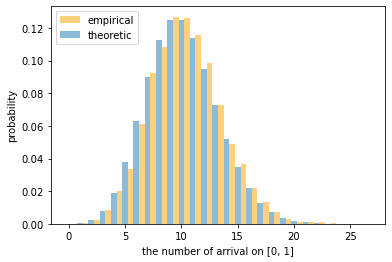

In [8]:
numbers=[]
for i in range(N):
    numbers.append(len(Poisson1(lam)))
plot1(numbers,lam)

### 5-3
Run **Poisson2** for 10000 rounds, record the first arrival time. (What if there is no arrival on $[0,1]$?) Plot the empirical distribution of the first arrival time, and validate your codes by comparing the empirical distribution with the theoretical distribution.

In [9]:
lam = 10
N = 10000

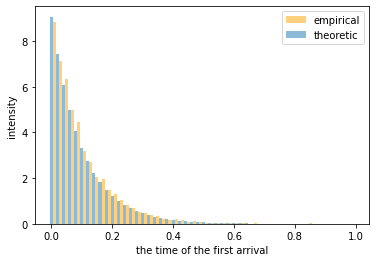

In [10]:
first_arrivals=[]
for i in range(N):
    first_arrivals.append(Poisson2(lam)[0])
plot2(first_arrivals, lam, bins=50)